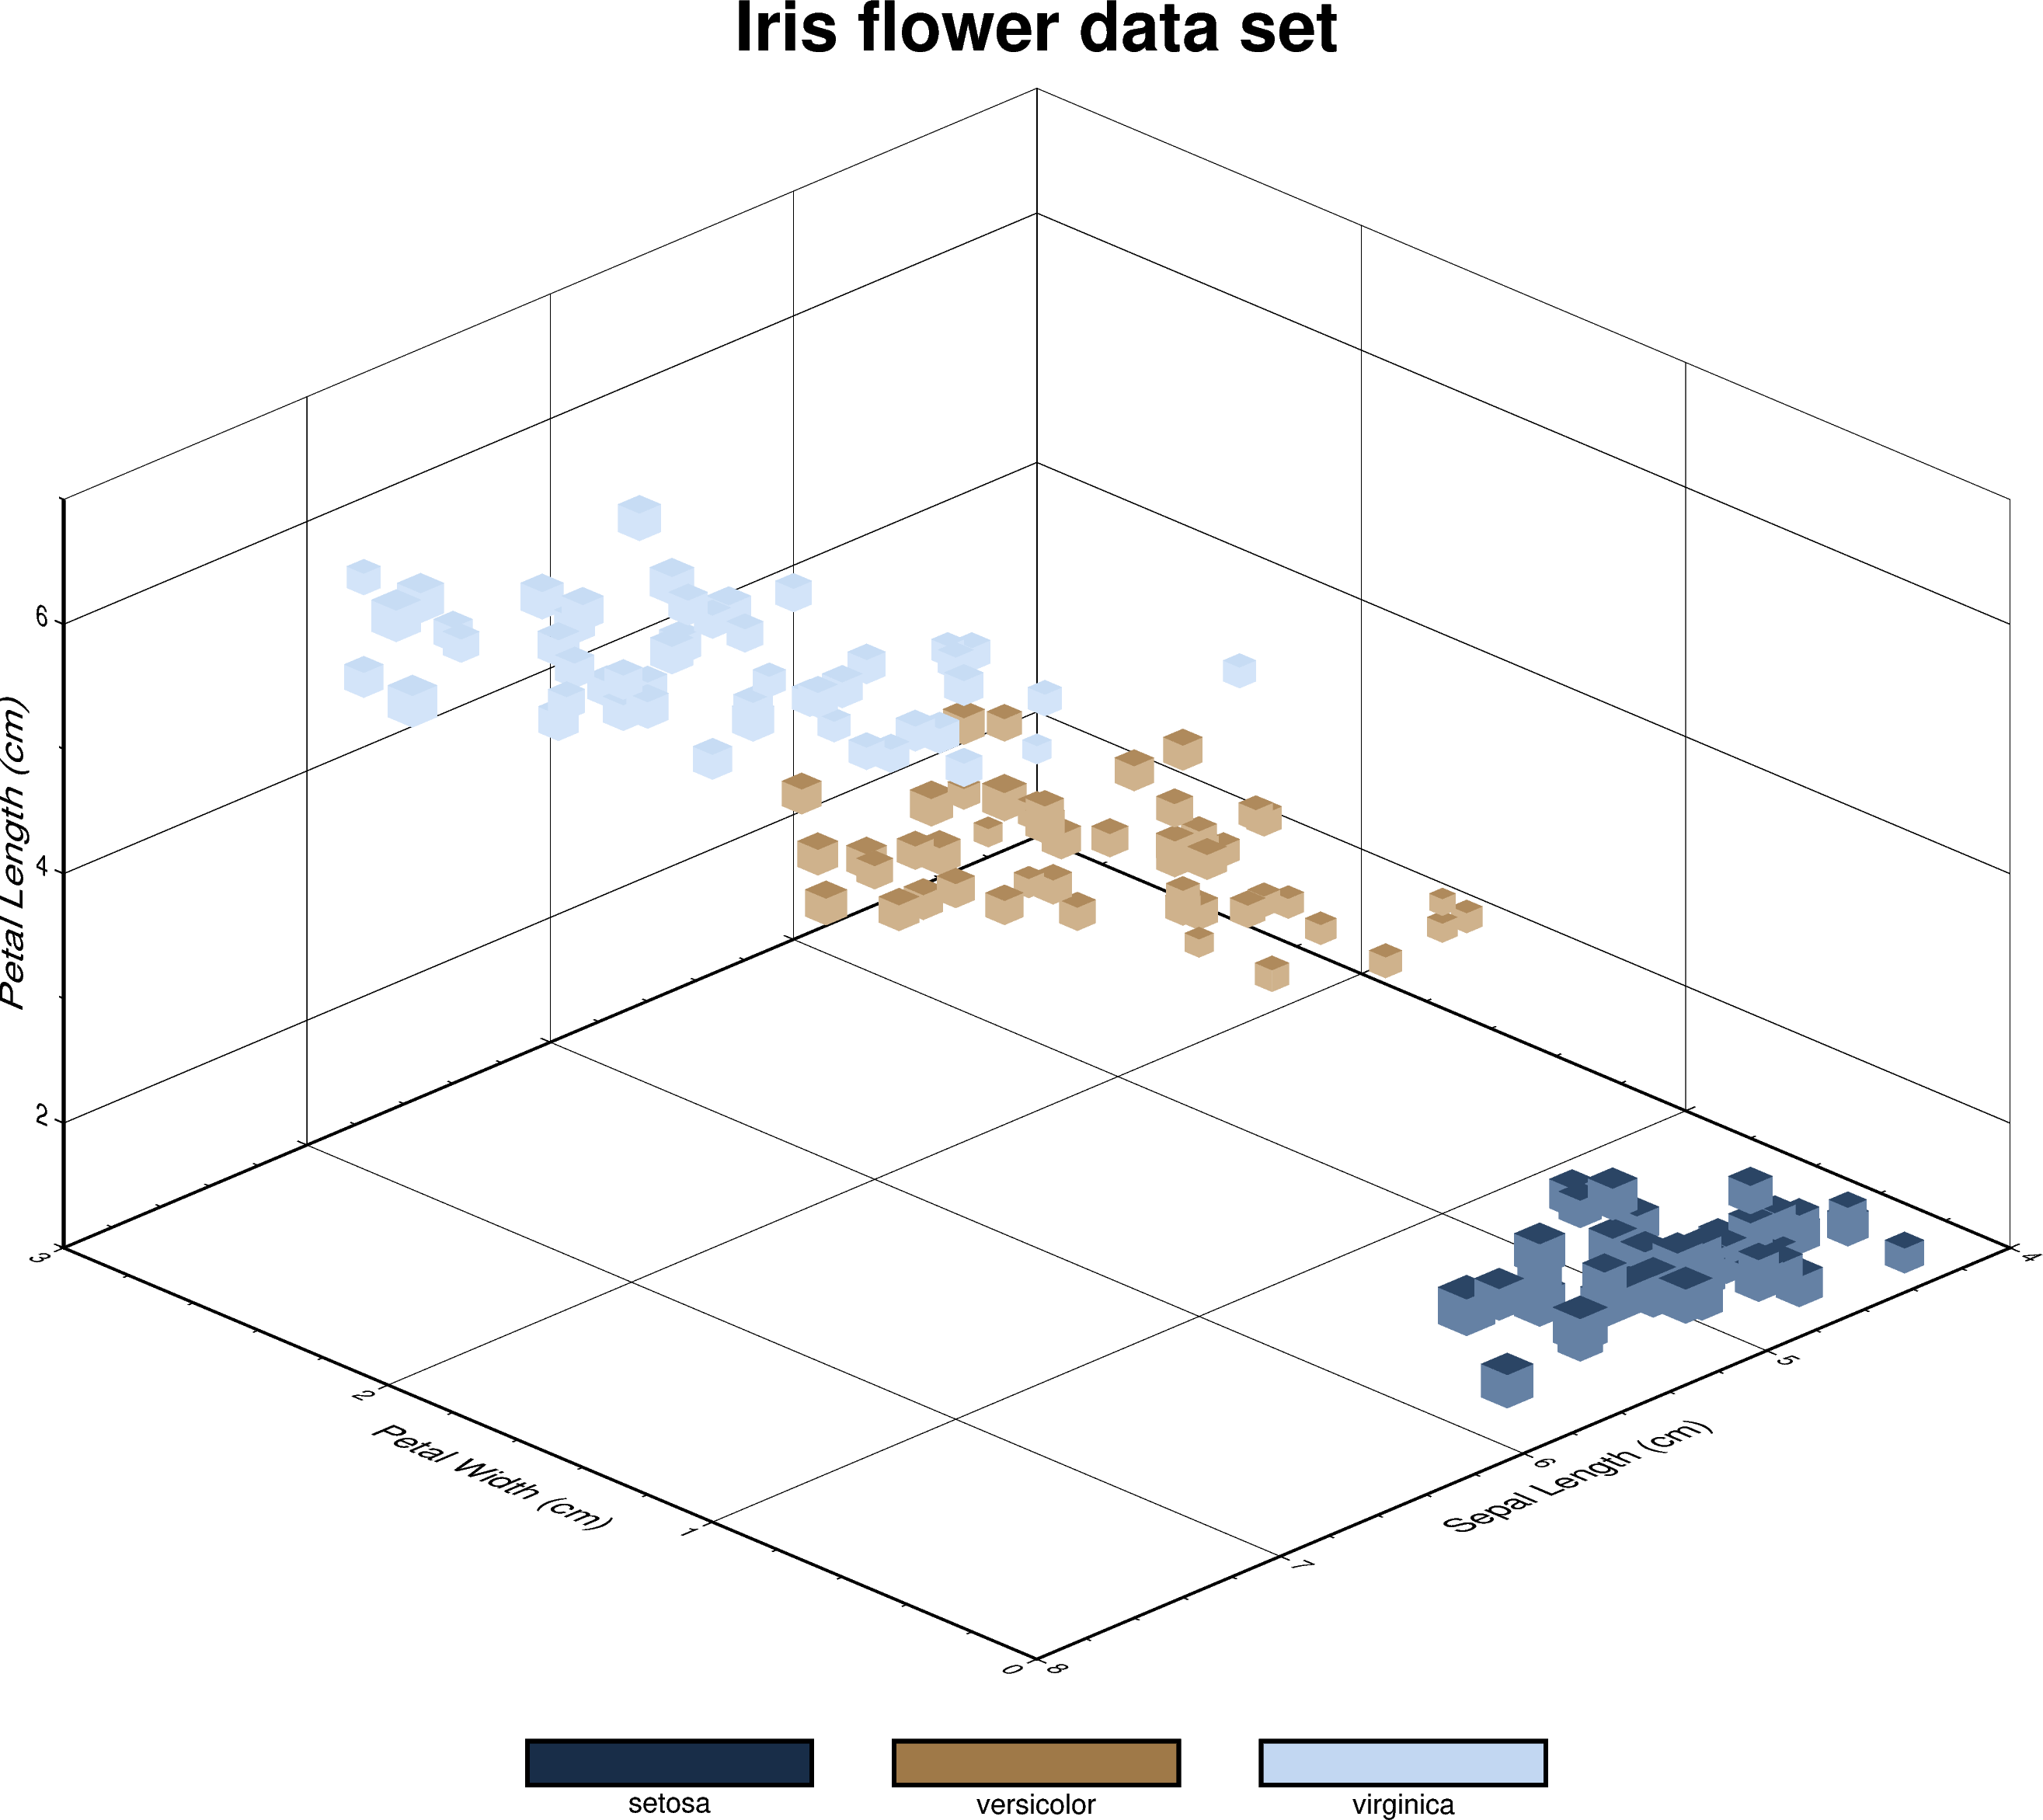

In [3]:
import pandas as pd
import pygmt

# Load sample iris data
df = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/iris.csv")

# Convert 'species' column to categorical dtype
# By default, pandas sorts the individual categories in an alphabetical order.
# For a non-alphabetical order, you have to manually adjust the list of
# categories. For handling and manipulating categorical data in pandas,
# have a look at:
# https://pandas.pydata.org/docs/user_guide/categorical.html
df.species = df.species.astype(dtype="category")

# Make a list of the individual categories of the 'species' column
# ['setosa', 'versicolor', 'virginica']
# They are (corresponding to the categorical number code) by default in
# alphabetical order and later used for the colorbar labels
labels = list(df.species.cat.categories)

# Use pygmt.info to get region bounds (xmin, xmax, ymin, ymax, zmin, zmax)
# The below example will return a numpy array [0.0, 3.0, 4.0, 8.0, 1.0, 7.0]
region = pygmt.info(
    data=df[["petal_width", "sepal_length", "petal_length"]],  # x, y, z columns
    per_column=True,  # Report the min/max values per column as a numpy array
    # Round the min/max values of the first three columns to the nearest
    # multiple of 1, 2 and 0.5, respectively
    spacing=(1, 2, 0.5),
)

# Make a 3-D scatter plot, coloring each of the 3 species differently
fig = pygmt.Figure()

# Define a colormap for three categories, define the range of the
# new discrete CPT using series=(lowest_value, highest_value, interval),
# use color_model="+csetosa,versicolor,virginica" to write the discrete color
# palette "cubhelix" in categorical format and add the species names as
# annotations for the colorbar
pygmt.makecpt(
    cmap="cubhelix",
    # Use the minimum and maximum of the categorical number code
    # to set the lowest_value and the highest_value of the CPT
    series=(df.species.cat.codes.min(), df.species.cat.codes.max(), 1),
    # Convert ['setosa', 'versicolor', 'virginica'] to
    # 'setosa,versicolor,virginica'
    color_model="+c" + ",".join(labels),
)

fig.plot3d(
    # Use petal width, sepal length, and petal length as x, y, and z
    # data input, respectively
    x=df.petal_width,
    y=df.sepal_length,
    z=df.petal_length,
    # Vary each symbol size according to the sepal width, scaled by 0.1
    size=0.1 * df.sepal_width,
    # Use 3-D cubes ("u") as symbols with size in centimeters ("c")
    style="uc",
    # Points colored by categorical number code (refers to the species)
    fill=df.species.cat.codes.astype(int),
    # Use colormap created by makecpt
    cmap=True,
    # Set map dimensions (xmin, xmax, ymin, ymax, zmin, zmax)
    region=region,
    # Set frame parameters
    frame=[
        "WsNeZ3+tIris flower data set",  # z axis label positioned on 3rd corner, add title
        "xafg+lPetal Width (cm)",
        "yafg+lSepal Length (cm)",
        "zafg+lPetal Length (cm)",
    ],
    # Set perspective to azimuth NorthWest (315°), at elevation 25°
    perspective=[315, 25],
    # Vertical exaggeration factor
    zscale=1.5,
)

# Shift the plot origin in x direction temporarily and add the colorbar
with fig.shift_origin(xshift=3.1):
    fig.colorbar()

fig.show()